Time series decomposition refers to the method by which we reduce our time series data into its following four components:

Trend [T]

Cycle [C]

Seasonality [S]

Remainder [R]

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
df = read_csv('/content/yahoo_stock.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
df.head()

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-03-08 00:00:00,11385,27,7.5,75.0,8.0,29.82,69.0
2020-02-08 23:00:00,12390,27,7.5,77.0,5.0,29.85,69.0
2020-02-08 22:00:00,13312,27,7.5,70.0,0.0,29.89,69.0
2020-02-08 21:00:00,13832,27,7.5,33.0,0.0,29.91,69.0
2020-02-08 20:00:00,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...
2007-01-05 05:00:00,6445,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05 04:00:00,6452,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05 03:00:00,6583,NaN,NaN,NaN,NaN,NaN,NaN


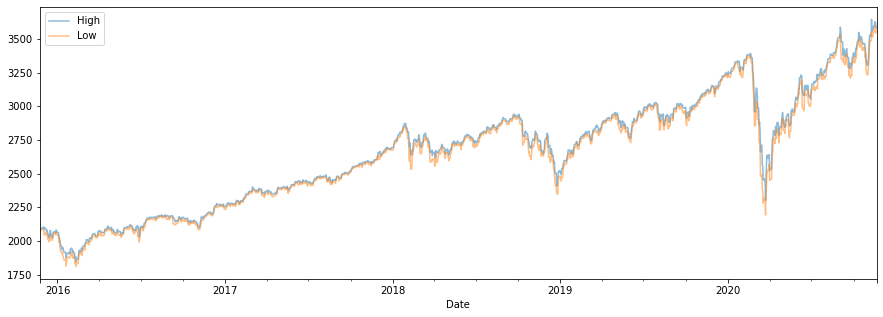

In [ ]:
df[['High', 'Low']].plot(figsize = (15, 5), alpha = 0.5)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq')
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq')

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return result_mul, result_add

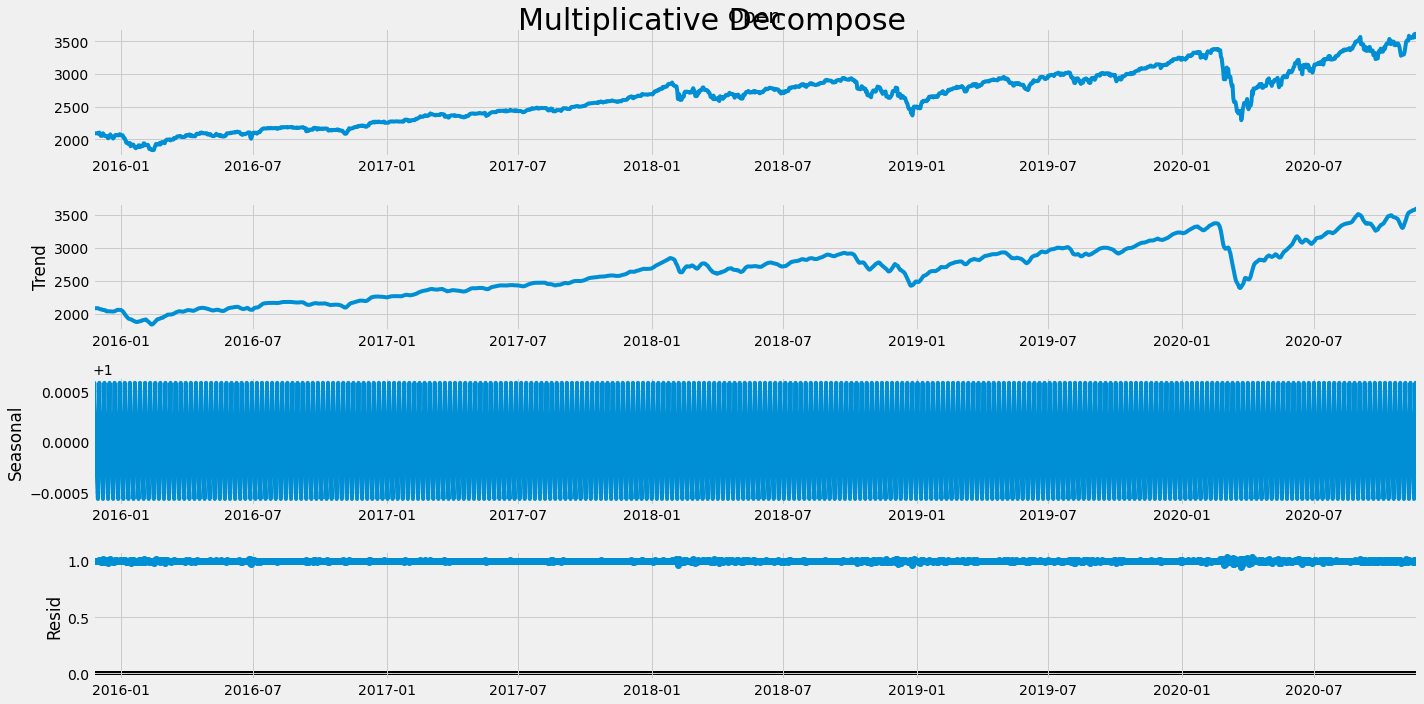

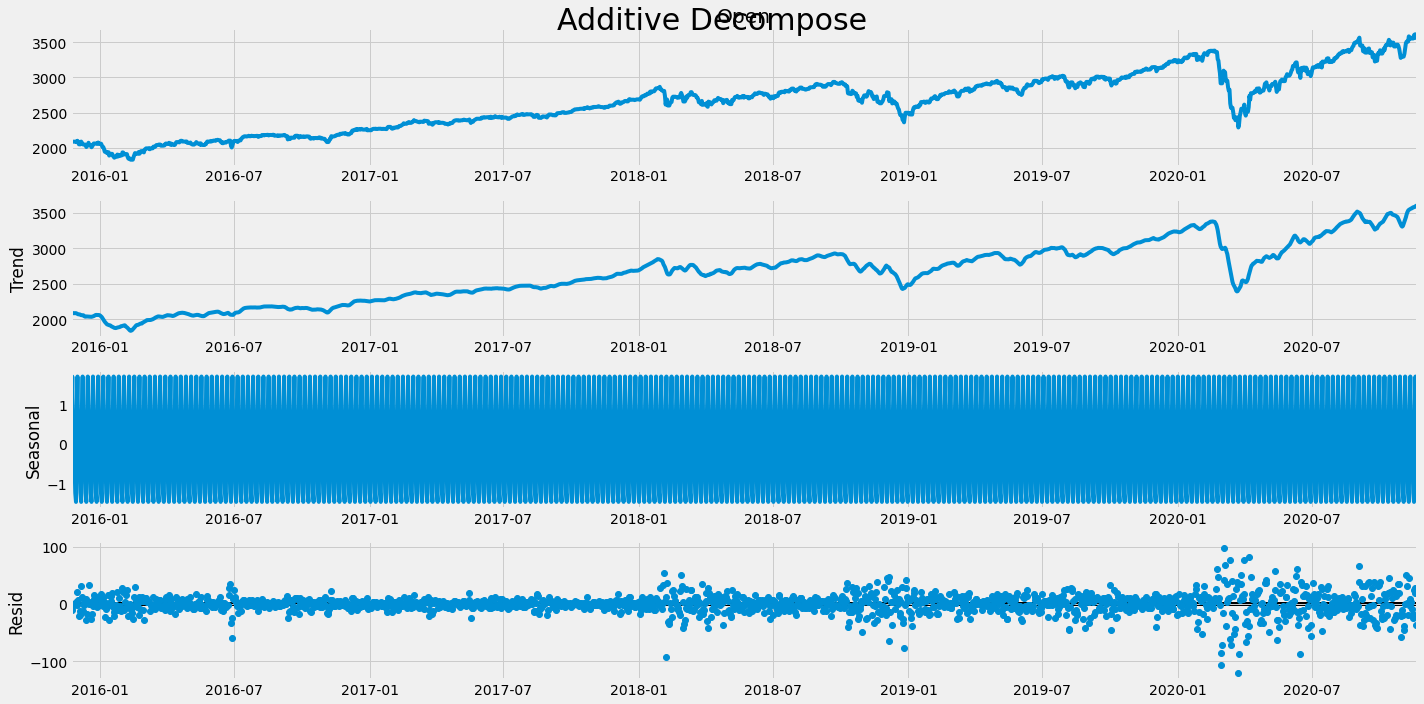

In [ ]:
result_mul, result_add = decompose(df, 'Open')

In [ ]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
Date,,,,
2015-11-23,-1.470815,2095.224034,-4.343307,2089.409912
2015-11-24,0.857702,2093.792649,-10.230428,2084.419922
2015-11-25,1.711380,2092.361263,-4.772595,2089.300049
2015-11-26,0.206508,2088.412877,0.680664,2089.300049
2015-11-27,0.343072,2088.632882,-0.155886,2088.820068
...,...,...,...,...
2020-11-16,-1.470815,3577.097168,24.533559,3600.159912
2020-11-17,0.857702,3580.917167,28.535190,3610.310059
2020-11-18,1.711380,3591.173640,19.205068,3612.090088


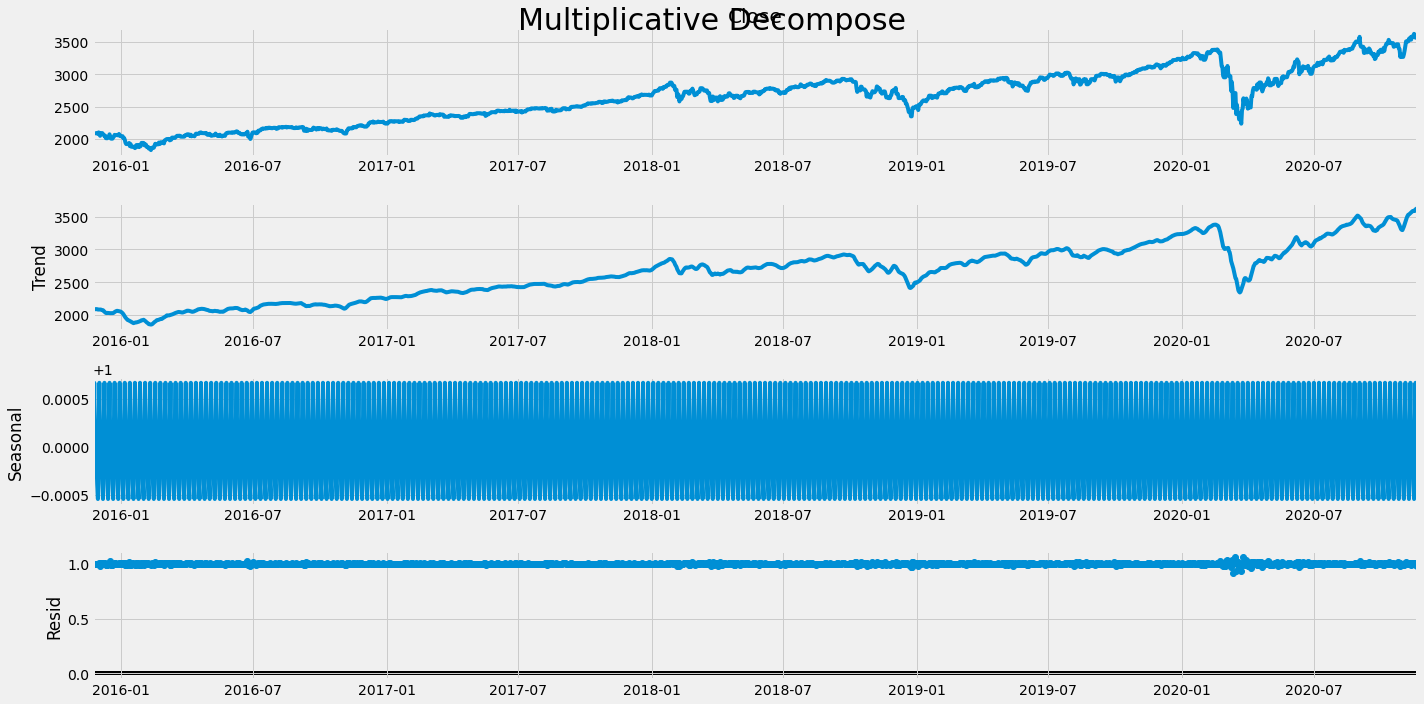

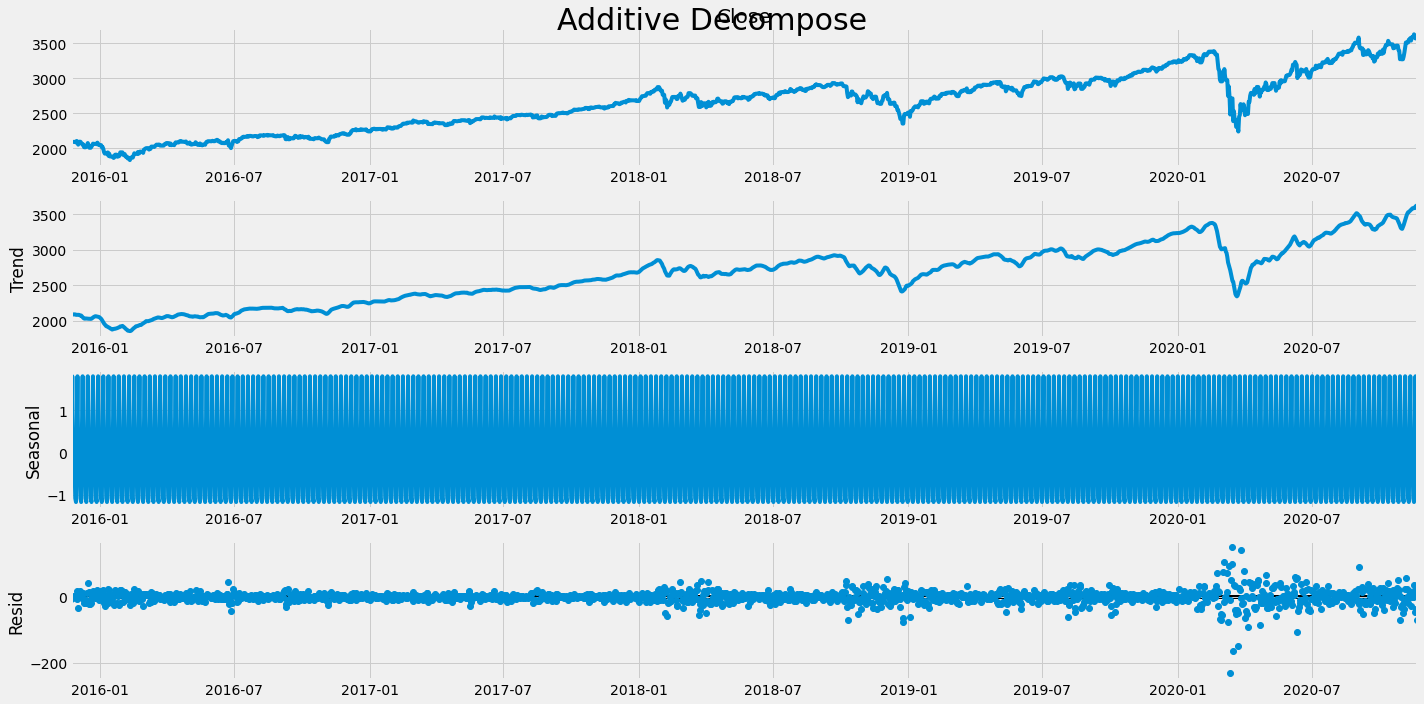

In [ ]:
result_mul, result_add = decompose(df, 'Close')

In [ ]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
Date,,,,
2015-11-23,-1.164921,2093.707970,-5.952962,2086.590088
2015-11-24,0.458303,2092.533927,-3.852337,2089.139893
2015-11-25,1.797703,2091.359883,-4.287469,2088.870117
2015-11-26,-0.055060,2089.114362,-0.189185,2088.870117
2015-11-27,0.301771,2088.231480,1.576856,2090.110107
...,...,...,...,...
2020-11-16,-1.164921,3591.649972,36.424861,3626.909912
2020-11-17,0.458303,3587.705706,21.366021,3609.530029
2020-11-18,1.797703,3611.870212,-45.877876,3567.790039


In this way, we are able to capture the trend, seasonality and residuals. By looking at these parameters, we can use trend or seasonality as features or use it to study the time-series dataset.